In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Load the data

df = pd.read_csv("/home/inventor/Datasets/Medical Cost/Medical_Cost/insurance.csv")

In [36]:
df.shape

(1338, 7)

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(1)

In [40]:
# Remove the Duplicaates

df.drop_duplicates(inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [42]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


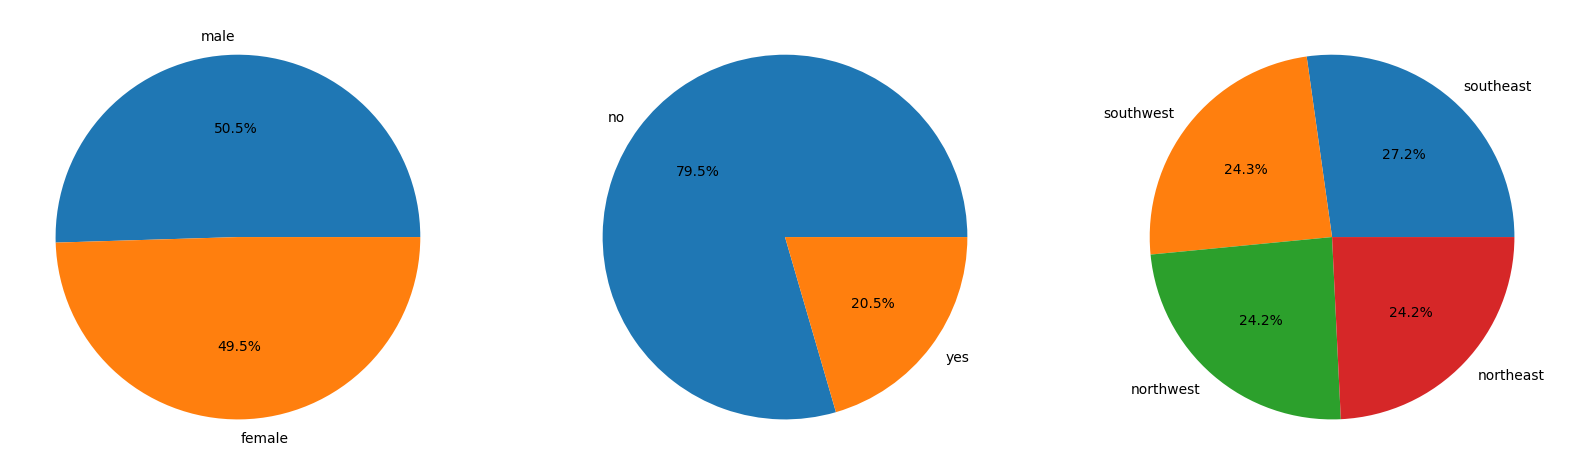

In [12]:
features = ["sex", "smoker", "region"]


plt.figure(figsize=(20, 10))
for i, cols in enumerate(features):

    plt.subplot(1, 3, i+1)

    x = df[cols].value_counts()

    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')


plt.show()
    


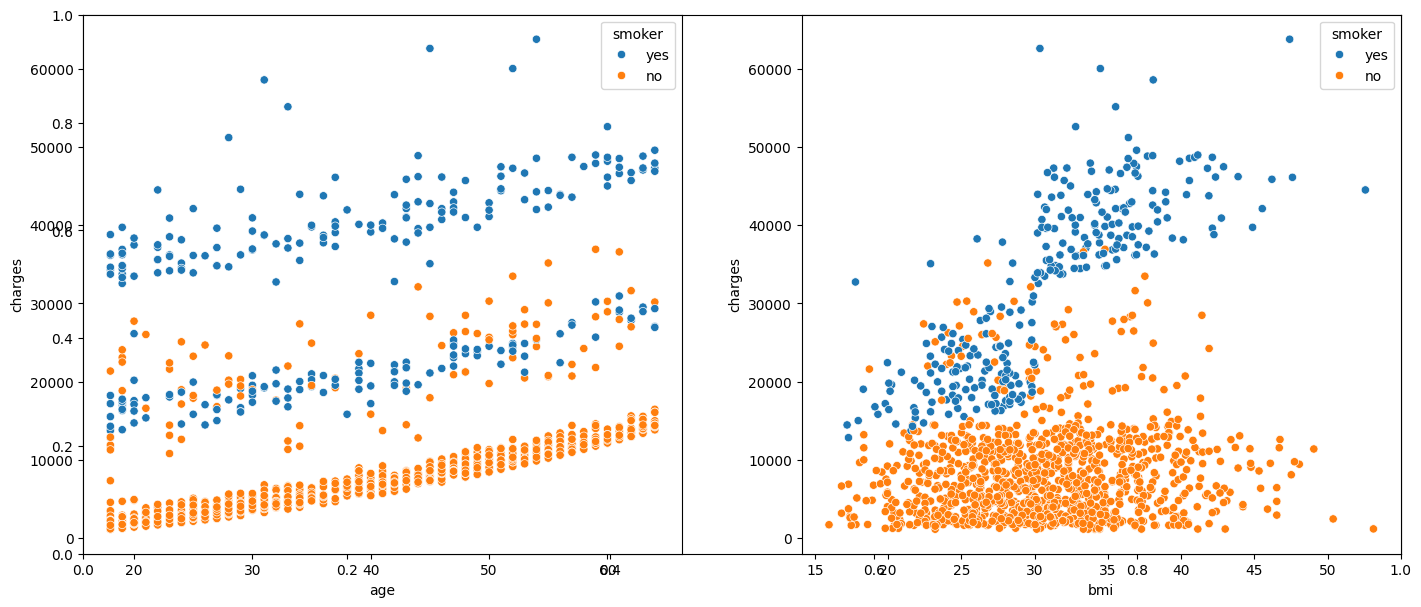

In [18]:
features = ["age", "bmi"]

plt.subplots(figsize=(17, 7))

for i, cols in enumerate(features):

    plt.subplot(1, 2, i + 1)

    sns.scatterplot(data=df, x=cols, y="charges", hue="smoker")

plt.show()

<Axes: ylabel='age'>

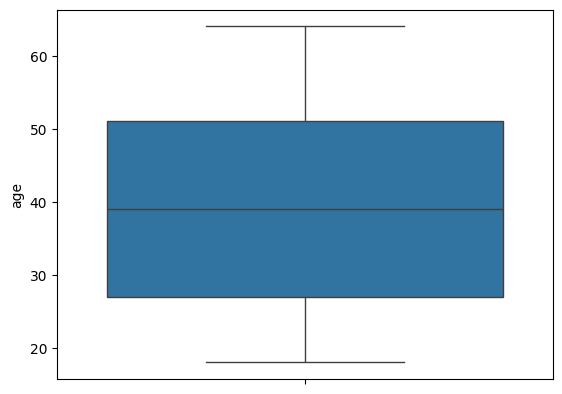

In [19]:
sns.boxplot(df["age"])

<Axes: ylabel='bmi'>

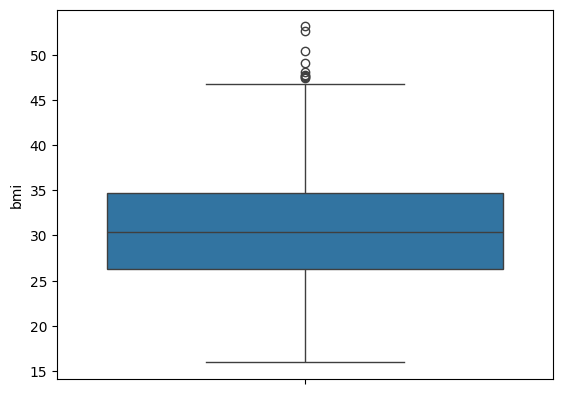

In [20]:
sns.boxplot(df["bmi"])

In [21]:
Q1 =  df["bmi"].quantile(0.25)
q2  = df["bmi"].quantile(0.5)
Q3 = df["bmi"].quantile(0.75)

iqr = Q3 - Q1

lowlim = Q1 - 1.5 * iqr
upperlim = Q3 + 1.5 * iqr

print(f"Low Limit {lowlim}")
print(f"Upper Limit {upperlim}")

Low Limit 13.674999999999994
Upper Limit 47.31500000000001


<Axes: ylabel='bmi'>

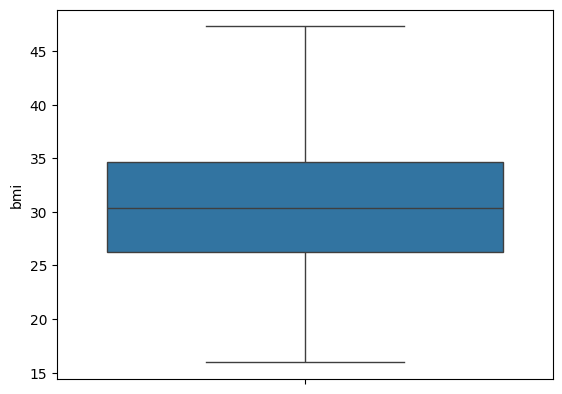

In [22]:
from feature_engine.outliers import ArbitraryOutlierCapper

arb = ArbitraryOutlierCapper(min_capping_dict={"bmi":13.674}, max_capping_dict={"bmi":47.315})

df[["bmi"]] = arb.fit_transform(df[["bmi"]])

sns.boxplot(df["bmi"])

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
# Standardize 

df["bmi"].skew()
df["age"].skew()

np.float64(0.054780773126998195)

In [44]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [1]:
num_cols = [feature for feature in df.columns if df[feature].dtype in ["int64", "float64"]]
cat_cols = [feature for feature in df.columns if df[feature].dtype not in ["int64", "float64"]]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2082548852.py, line 2)

In [53]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")

encoded = one_hot.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=one_hot.get_feature_names_out(cat_cols))

encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0,0.0,1.0,0.0,0.0


In [55]:
encoded_df.drop(["sex", "smoker", "region"], axis=1, inplace=True)

In [56]:
encoded_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0


In [57]:
encoded_df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [59]:
encoded_df["sex_male"] = encoded_df["sex_male"].astype("int64")
encoded_df["smoker_yes"] = encoded_df["smoker_yes"].astype("int64")
encoded_df["region_northwest"] = encoded_df["region_northwest"].astype("int64")
encoded_df["region_southeast"] = encoded_df["region_southeast"].astype("int64")
encoded_df["region_southwest"] = encoded_df["region_southwest"].astype("int64")

In [60]:
encoded_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("charges", axis=1), encoded_df["charges"], test_size=0.2, random_state=42)

In [62]:
X_train.shape, y_train.shape

((1070, 8), (1070,))

In [63]:
X_train, y_train

(      age     bmi  children  sex_male  smoker_yes  region_northwest  \
 560    46  19.950         2         0           0                 1   
 1285   47  24.320         0         0           0                 0   
 1142   52  24.860         0         0           0                 0   
 969    39  34.320         5         0           0                 0   
 486    54  21.470         3         0           0                 1   
 ...   ...     ...       ...       ...         ...               ...   
 1095   18  31.350         4         0           0                 0   
 1130   39  23.870         5         0           0                 0   
 1294   58  25.175         0         1           0                 0   
 860    37  47.600         2         0           1                 0   
 1126   55  29.900         0         1           0                 0   
 
       region_southeast  region_southwest  
 560                  0                 0  
 1285                 0                 0  
 1

In [64]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

r2_score_lr = r2_score(y_test, y_pred_lr)

mae_lr = mean_absolute_error(y_test, y_pred_lr)

rmse_lr = root_mean_squared_error(y_test, y_pred_lr)

print(f"R2 Score: {r2_score_lr}")
print(f"MAE LR: {mae_lr}")
print(f"RMSE LR: {rmse_lr}")

R2 Score: 0.7835929767120724
MAE LR: 4181.19447375365
RMSE LR: 5796.284659276273


In [66]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100)

random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)

In [70]:
r2_score_forest = r2_score(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
rmse_forest = root_mean_squared_error(y_test, y_pred_forest)

print(f"R2 Score Forest: {r2_score_forest}")
print(f"MAE Forest: {mae_forest}")
print(f"RMSE Forest: {rmse_forest}")

R2 Score Forest: 0.8640348599457036
MAE Forest: 2545.0998171773945
RMSE Forest: 4594.389569957127


In [72]:
score = {

    "R2 Score": [r2_score_lr, r2_score_forest], 
    "RMSE": [rmse_lr, rmse_forest], 
    "MAE": [mae_lr, mae_forest]
}

score_df = pd.DataFrame(data=score, index=["Linear Regression", "Random Forest"])

score_df

,R2 Score,RMSE,MAE
Linear Regression,0.783593,5796.284659,4181.194474
Random Forest,0.864035,4594.389570,2545.099817


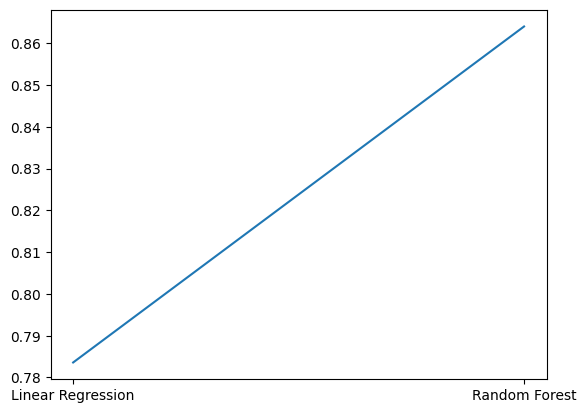

In [73]:
plt.plot(score_df["R2 Score"])

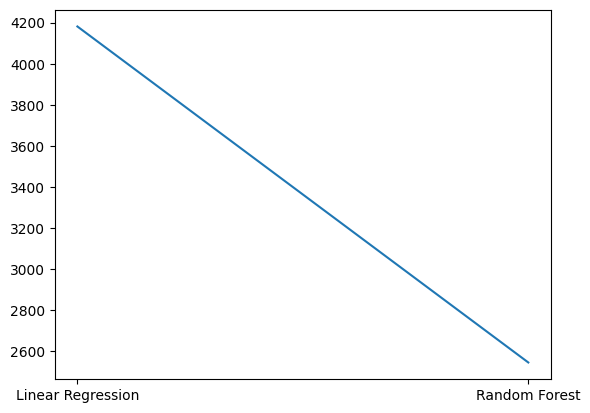

In [74]:
plt.plot(score_df["MAE"])

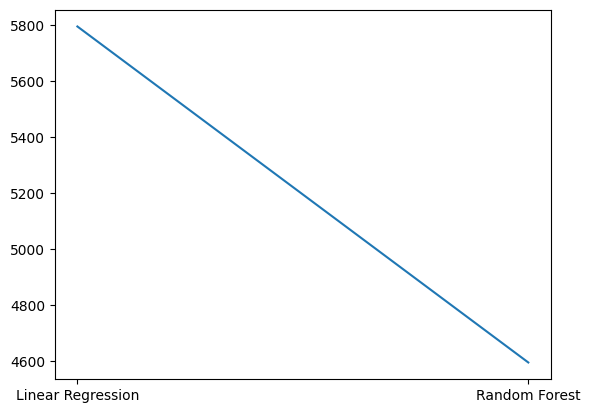

In [75]:
plt.plot(score_df["RMSE"])